# Imports

In [1]:
setLatex = False

import warnings
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import re

import sys
from IPython.display import Math

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from importlib import reload
LongScripts = "/Users/nihao/Dropbox/Documents/Career/Calculs/Scripts/"
os.chdir(LongScripts)
import methodsLongitudinal as ml
reload(ml)


from copy import deepcopy

from scipy.spatial import cKDTree
from math import pi, sqrt
import pickle
import scipy.ndimage.filters

import matplotlib

from pylab import *

import matplotlib.gridspec as gridspec


def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    #MAX_HEIGHT_INCHES = 7.0
    #if fig_height > MAX_HEIGHT_INCHES:
    #    print("WARNING: fig_height too large:" + fig_height + 
    #          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    #    fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif',
              'figure.autolayout': True,
              'lines.linewidth' : 1.0
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):
    
    SPINE_COLOR = 'gray'

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)




from mpl_toolkits.axes_grid1 import make_axes_locatable




# Prepare data

## t2G

Text(0.5, 1.0, 'F$_N=1$ nN')

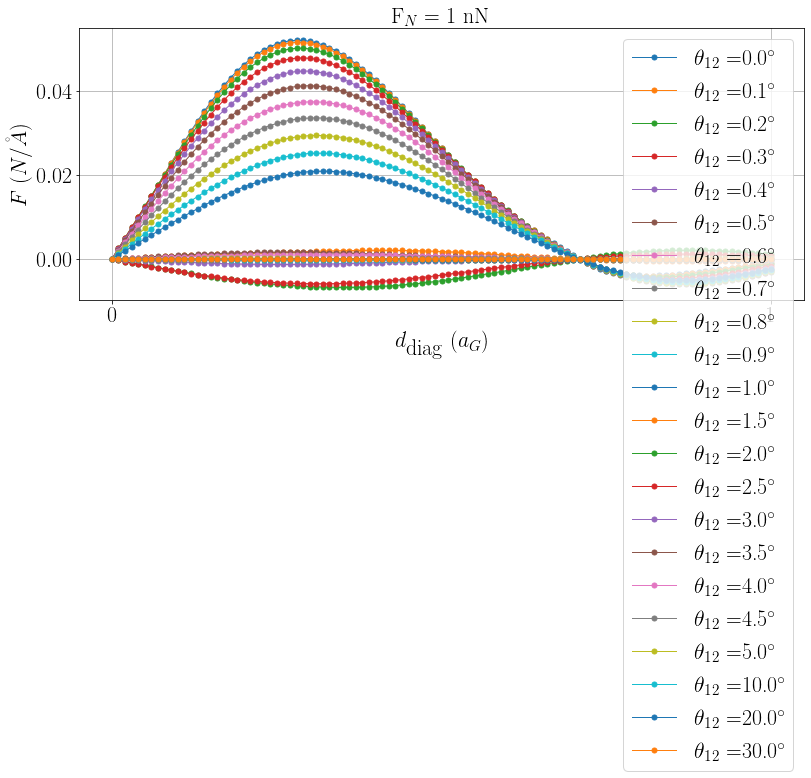

In [2]:
import numpy as np

datadir = '/Users/nihao/Dropbox/Documents/Career/Calculs/frictionCoefficients/hexagonal_t2G/HexaFlake_YJ_Feb13ver/Radius20/Ang0.0/smallSystem/force1/'

# vecdir     = - np.array([0.48219008, -0.00647425 ]) # 
vecdir     =   np.array([1.0, 0.0 ])     #  dx, dy in in.quasistatic
vecdir     =   vecdir/ np.sqrt(vecdir[0]**2+vecdir[1]**2)

dstep = 1/100          # np.sqrt(vecdir[0]**2+vecdir[1]**2) in the unit of 'a_ref=2.505...\AA' 
N        = 100              # number of steps
dx       = np.arange(N+1)*dstep           #; print(dx.shape)

import matplotlib.pyplot as plt
latexify(columns=1,fig_width=2.6*5, fig_height=1*5)
fig, ax = plt.subplots(1, 1,sharey = "row")

fmaxVecBG = []
fAveVecBG = []
fintegrateBG = []

AngVecBG = ['0.0', '0.1' ,'0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0',
          '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '10.0', '20.0', '30.0']
for Ang in AngVecBG:#['1.0','1.56','3.0']:
    forces  = np.genfromtxt(f'{datadir}/Ang{Ang}/force.txt')

    fx, fy, fz = forces[:,1],forces[:,2],forces[:,3]
    fabs       = fx*vecdir[0] + fy*vecdir[1] 
    fmaxVecBG.append(np.max(fabs)/2644)
    fAveVecBG.append(np.mean(fabs))
    fintegrateBG.append(np.trapz(abs(fabs),dx)/2644)
    
    ax.plot(dx,fabs/2644,'-o',lw=1,ms=5,label='$\\theta_{12} = $'+Ang+'$^{\circ}$')


fsize = 22
ax.set_xlabel('$d_{\\textrm{diag}}\ (a_{G})$', fontsize=fsize)

ax.set_xticks(np.arange(2))
#ax.set_ylim(-15.1,15.1)
#ax.set_yticks([-15,-10,-5,0,5,10,15])
ax.grid('on')

ax.legend(loc=0, fontsize=fsize)

ax.set_ylabel('$F\ (N/\AA)$', fontsize=fsize)
ax.tick_params(labelsize=fsize)
ax.set_title( 'F$_N=1$ nN', fontsize=fsize)

## t3G

In [7]:
import numpy as np

datadir = '/Users/nihao/Dropbox/Documents/Career/Calculs/frictionCoefficients/hexagonal_t2G/forNicolas/withFire/size40/'

# vecdir     = - np.array([0.48219008, -0.00647425 ]) # 
#vecdir     =   np.array([0.48219008, -0.00647425 ])     #  dx, dy in in.quasistatic
vecdir     =   np.array([0.142026334, -0.001906952 ])     #  dx, dy in in.quasistatic
vecdir     =   vecdir/ np.sqrt(vecdir[0]**2+vecdir[1]**2)

dstep = 1/15         # np.sqrt(vecdir[0]**2+vecdir[1]**2) in the unit of 'a_ref=2.505...\AA' 
N        = 15            # number of steps
dx       = np.arange(N+1)*dstep           #; print(dx.shape)

#import matplotlib.pyplot as plt
#latexify(columns=1,fig_width=2.6*5, fig_height=1*5)
#fig, ax = plt.subplots(1, 1,sharey = "row")

fmaxVec_40 = []
fAveVec = []
fintegrate_40 = []

AngVec_40 = ['0.0','0.1','0.25','0.5','0.75','1.0','1.125','1.25','1.538','1.75','1.875','2.0','2.25','2.5','2.75','3.0','3.5','4.0']#,'5.0']
#AngVec = ['1.538']
for Ang in AngVec_40:#['1.0','1.56','3.0']:
    #print(Ang)
    forces  = np.genfromtxt(f'{datadir}/Ang{Ang}/force.txt')

    fx, fy, fz = forces[:,1],forces[:,2],forces[:,3]
    fabs       = fx*vecdir[0] + fy*vecdir[1] 
    fmaxVec_40.append(np.max(fabs)/10083)
    fAveVec.append(np.mean(fabs))
    fintegrate_40.append(np.trapz(abs(fabs),dx)/10083)
    
    #ax.plot(dx,fabs/2644,'-o',lw=1,ms=5,label='$\\theta_{32} = $'+Ang+'$^{\circ}$')


fsize = 22
#ax.set_xlabel('$d_{\\textrm{diag}}\ (a_{G})$', fontsize=fsize)
#
#ax.set_xticks(np.arange(2))
##ax.set_ylim(-15.1,15.1)
##ax.set_yticks([-15,-10,-5,0,5,10,15])
#ax.grid('on')
#
#ax.legend(loc=2, fontsize=fsize)
#
#ax.set_ylabel('$F\ (N/\AA)$', fontsize=fsize)
#ax.tick_params(labelsize=fsize)
#ax.set_title( '$\\theta_{12} = 1.538^{\circ}$ - F$_N=1$ nN', fontsize=fsize)

# Main figure

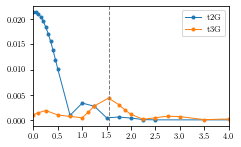

In [8]:
import matplotlib.pyplot as plt


latexify(columns=1)#,fig_width=2.6*5, fig_height=1*5)
fig, (ax1) = plt.subplots(nrows=1, ncols=1)#,figsize=(4,4))

marksize = 3
#ax1.plot([float(el)*3.5 for el in AngVecBG],fmaxVecBG,"-o",label="t2G, D=10nm")
#ax1.plot([float(el)*5*3.5 for el in AngVecBG_100],fmaxVecBG_100,"-o",label="t2G, D=50nm")
#ax1.plot([float(el) for el in AngVecBG],fintegrateBG,"-o",label="t2G, D=10nm",ms=marksize)
ax1.plot([float(el)/2 for el in AngVecBG],fintegrateBG,"-o",label="t2G",ms=marksize)
#ax1.plot([float(el) for el in AngVecBG_100],fintegrateBG_100,"-o",label="t2G, D=50nm",ms=marksize)
#ax1.plot([float(el) for el in AngVec_20],fintegrate_20,"-o",label="t3G, D=10nm",ms=marksize)
ax1.plot([float(el) for el in AngVec_40],[float(el) for el in fintegrate_40],"-o",label="t3G",ms=marksize)
#ax1.plot([float(el) for el in AngVec_40_fixed],[float(el) for el in fintegrate_40_fixed],"-o",label="t3G, D=20 nm, fix middle",ms=marksize)
#ax1.plot([float(el) for el in AngVec_40_for0],[float(el) for el in fintegrate_40_for0],"x",label="t3G, D=20nm (zero degree point)",ms=marksize)
#ax1.plot([float(el) for el in AngVec_40_for0],[float(el)/5*3 for el in fintegrate_40_for0],"-o",label="t3G, D=20nm (zero degree point)",ms=marksize)
#ax1.plot([float(el) for el in AngVec_40_for1_538],[float(el) for el in fintegrate_40_for1_538],"-o",label="t3G, D=20nm (zero degree point)",ms=marksize)
#ax2.plot([float(el) for el in AngVec],fmaxVec_20,"-o",label="t3G - 10nm")
#ax2.plot([float(el) for el in AngVec],fmaxVec_40,"-o",label="t3G - 20nm")
#ax2.plot([float(el) for el in AngVec],fmaxVec_60,"-o",label="t3G - 30nm")
#ax2.plot([float(el) for el in AngVec2],fmaxVec_80,"-o",label="t3G - 40nm")
#ax2.plot([float(el) for el in AngVec2],fmaxVec_100,"-o",label="t3G - 40nm")
#ax2.plot([float(el) for el in AngVec2],fintegrate_80,"-o",label="t3G - 40nm")

#ax1.legend(loc=0)
#ax1.legend(bbox_to_anchor=(0.23,0.7))
#ax2.legend(loc=0)

#ax1.set_title("Flake calculations")
#ax2.set_title("Periodic calculations")
#ax1.set_ylim(0,0.02)

#ax1.axvline(1.538,color="grey",linestyle="dashed")
#ax1.axhline(np.max(fintegrateBG)/2,color="grey",linestyle="dashed")
#ax1.axvline(0.47,color="grey",linestyle="dashed")
#ax1.axhline(np.max(fintegrate_40)/5*3.5/2,color="grey",linestyle="dashed")
#ax1.axvline(1.538-0.40,color="grey",linestyle="dashed")

#ax2.plot([float(el) for el in AngVecBGp],fintegrate,"--o",label="t3G, periodic",color="C6",ms=marksize)
#ax2.plot([float(el) for el in AngVecBGp_2L],fintegrate_2L,"--o",label="t2G, periodic",color="C7",ms=marksize)
#ax2.plot([float(el) for el in AngVecBGp_2L_large],fintegrate_2L_large,"-o",label="t2G - larger supercell",color="C8",ms=marksize)

ax1.legend(loc=0)
ax1.axvline(1.538,linestyle="dashed",color="grey")

ax1.set_xlim(0,4)
#ax2.set_xlim(0,4)

#ax1.set_ylabel("F$_f$ (nN)")
#ax2.set_ylabel("F$_f$ (nN)")
#ax2.set_ylabel("F$_f$ (nN)")
#ax1.set_xlabel(r"$\theta$ $(\degree)$")

os.chdir("/Users/nihao/Desktop")
fig.savefig("FrictionCoefficients.png",dpi=600,bbox_inches="tight")